In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [82]:
df = pd.read_csv("mba_decision_dataset.csv")

df = df.dropna() 

# label_encoders = {}
# for col in df.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le
#     
y = df['Decided to Pursue MBA?'].map({'No': 0, 'Yes': 1})
df = df.drop(columns=['Decided to Pursue MBA?'])
# df=df.drop(columns=['Person ID'])
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)
X = df


scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

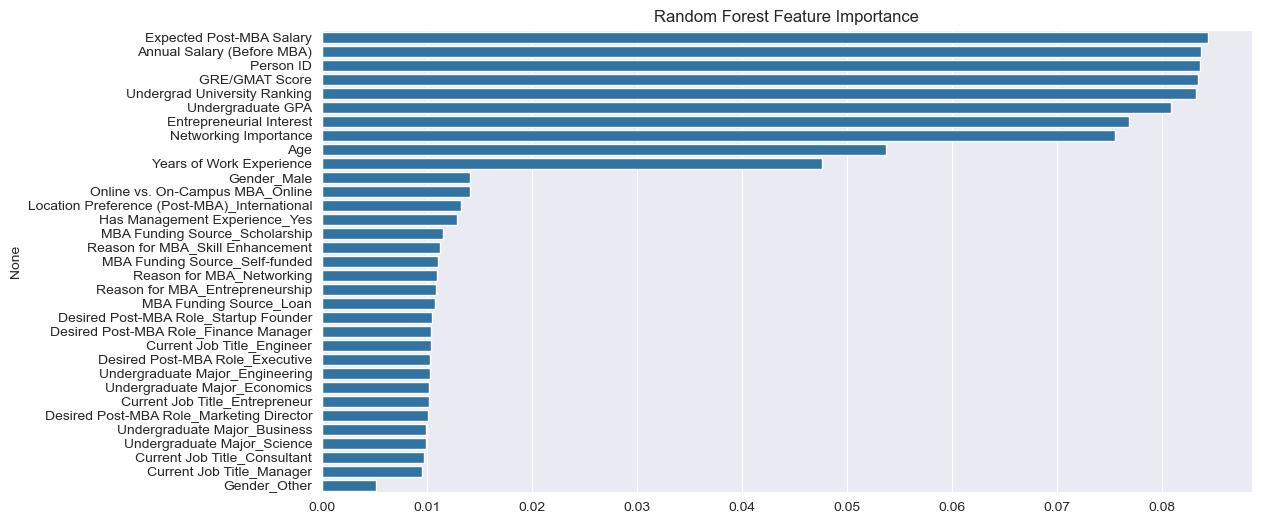

Random Forest Accuracy: 0.5670


In [83]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=rf_importance.values, y=rf_importance.index)
plt.title("Random Forest Feature Importance")
plt.show()

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

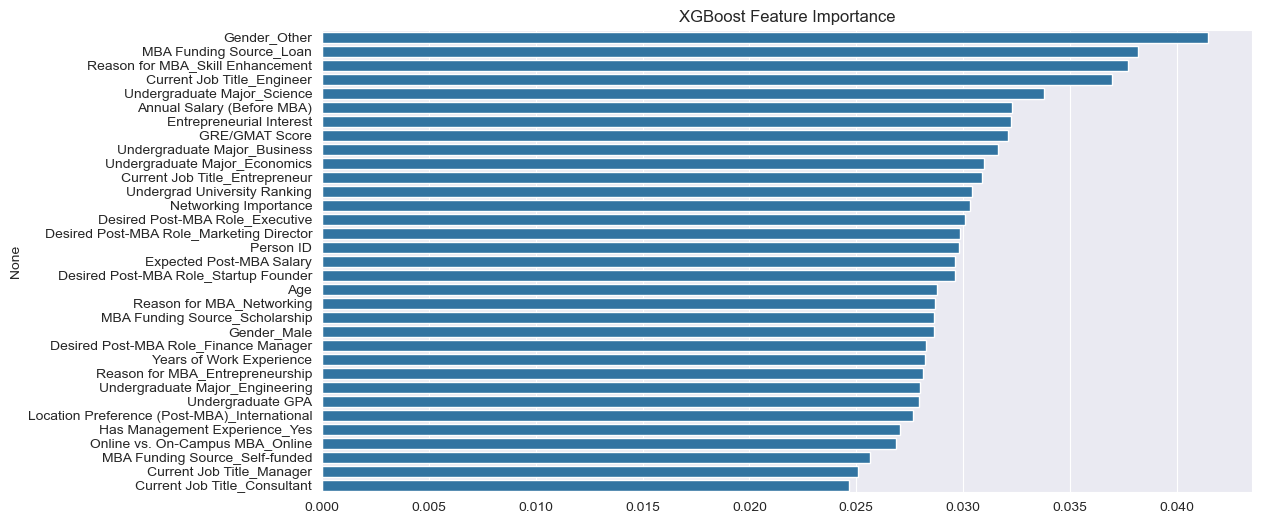

XGBoost Accuracy: 0.5480


In [86]:

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index)
plt.title("XGBoost Feature Importance")
plt.show()

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


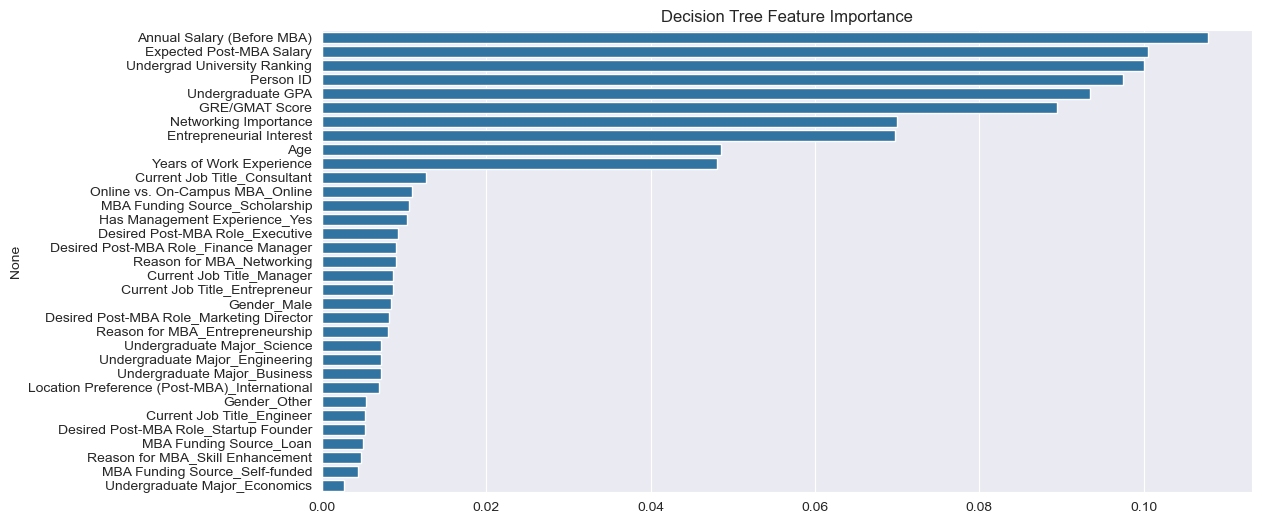

Decision Tree Accuracy: 0.5165


In [87]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

dt_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=dt_importance.values, y=dt_importance.index)
plt.title("Decision Tree Feature Importance")
plt.show()
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

In [90]:
top_features = rf_importance.index[:9]
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [91]:
top_rf = RandomForestClassifier(n_estimators=100, random_state=42)
top_rf.fit(X_train_selected, y_train)
y_pred_top_rf = top_rf.predict(X_test_selected)
top_rf_accuracy = accuracy_score(y_test, y_pred_top_rf)

top_xgb = XGBClassifier(eval_metric='logloss')
top_xgb.fit(X_train_selected, y_train)
y_pred_top_xgb = top_xgb.predict(X_test_selected)
top_xgb_accuracy = accuracy_score(y_test, y_pred_top_xgb)

top_dt = DecisionTreeClassifier(random_state=42)
top_dt.fit(X_train_selected, y_train)
y_pred_top_dt = top_dt.predict(X_test_selected)
top_dt_accuracy = accuracy_score(y_test, y_pred_top_dt)

print(f"Random Forest (Top Features) Accuracy: {top_rf_accuracy:.4f}")
print(f"XGBoost (Top Features) Accuracy: {top_xgb_accuracy:.4f}")
print(f"Decision Tree (Top Features) Accuracy: {top_dt_accuracy:.4f}")

Random Forest (Top Features) Accuracy: 0.5690
XGBoost (Top Features) Accuracy: 0.5335
Decision Tree (Top Features) Accuracy: 0.5135
